In [2]:
%run "elegant_plot.ipynb" 
import re
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
cmap = cmaps.viridis
norm = mpl.colors.Normalize(0.05, 0.50)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
def visualize(position_vector, shape_info_bodies, theta, ax):
    
    for i in range(0, 8):
               
        corner_body = np.array([[l*np.cos(theta+position_vector[2+3*i,0])+position_vector[0+3*i,0], l*np.sin(theta+position_vector[2+3*i,0])+\
                            position_vector[1+3*i,0]] for l,theta in zip(shape_info_bodies[i, :, 0],shape_info_bodies[i, :, 1])]) 
        lw_ = 1 if i == 0 or 2 else 0
        ax.plot(corner_body[:,0], corner_body[:,1], 'o', color = 'white', markeredgecolor='black', markersize = 1.5) 
        ax.add_patch(patches.Polygon(corner_body,closed=True,fill=True, color = '#2E348E', alpha = 1)) 
        
        ax.yaxis.set_ticks([-2, -1, 0, 1, 2]) 
        ax.xaxis.set_ticks([-2, -1, 0, 1, 2]);        
        ax.set_ylim([-2.5, 2.5]); ax.set_xlim([-2.5, 2.5]) 

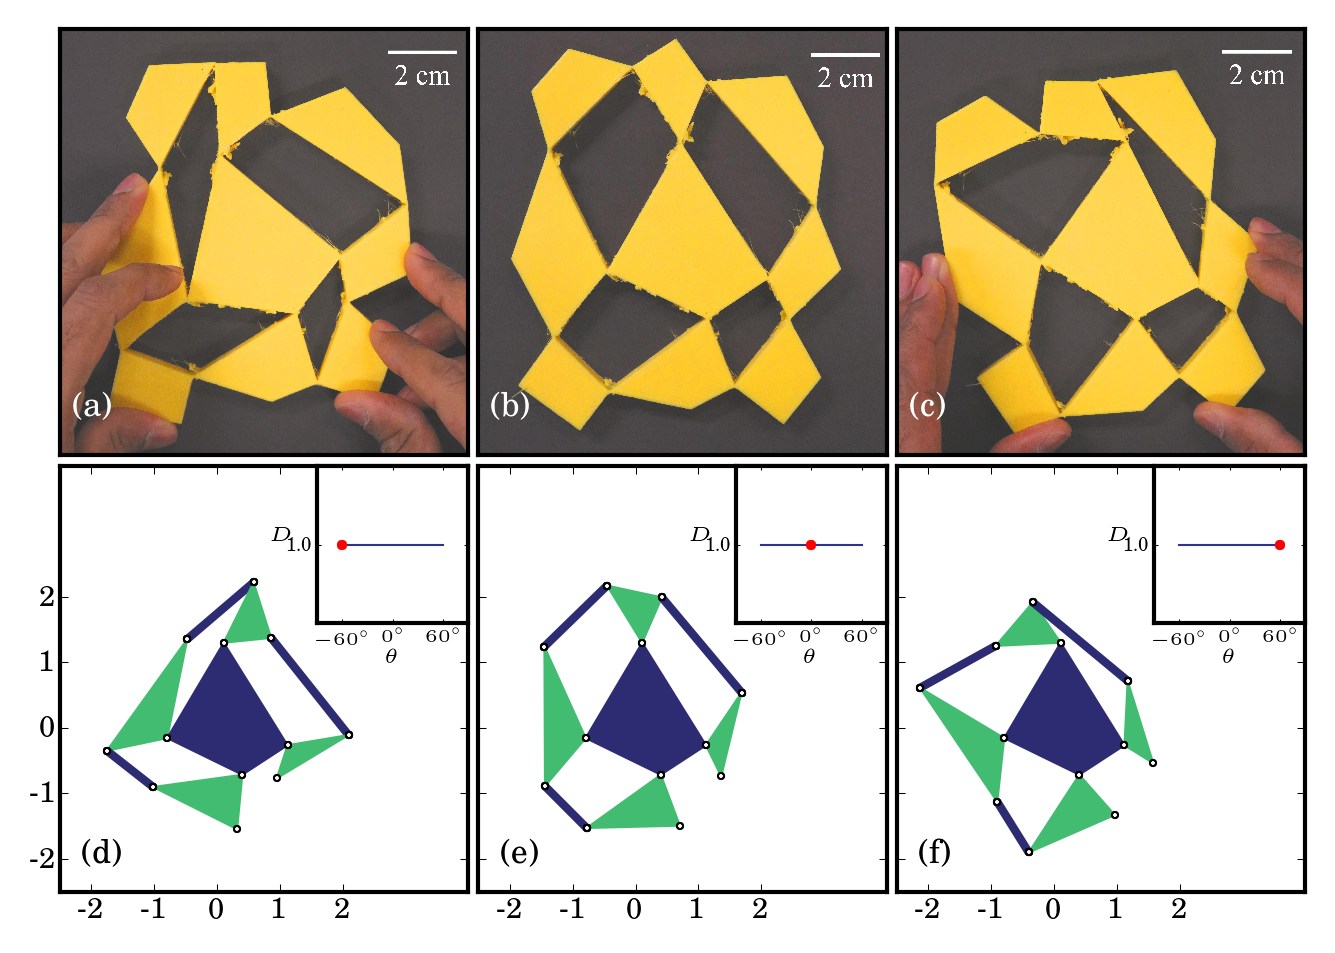

In [8]:
import matplotlib.patches as patches
        
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

from Helper_Files.Figure_2_hlpr import hlpr_fun as decode_posVec

fullfig(hf = 1.60)

gs1 = GridSpec(2, 3)
#gs1.update(wspace=0.0, hspace = 0.25)
ax1 = plt.subplot(gs1[0:1]); ax2= plt.subplot(gs1[1:2]); ax3 = plt.subplot(gs1[2:3])
ax4 = plt.subplot(gs1[3:4]); ax5 = plt.subplot(gs1[4:5]); ax6 = plt.subplot(gs1[5:6])
plt.subplots_adjust(hspace=0.025, wspace = 0.025)

img=mpimg.imread(r"C:\Users\singh\Dropbox\Nitin Singh\Thesis\Entire Thesis\Figures\Evolutionary Design\Section 9\3d_flexible_3.JPG")
ax1.imshow(img, interpolation='nearest', aspect='auto')
ax1.set_yticks([]); ax1.set_xticks([])


img=mpimg.imread(r"C:\Users\singh\Dropbox\Nitin Singh\Thesis\Entire Thesis\Figures\Evolutionary Design\Section 9\3d_flexible_2.JPG")
ax2.imshow(img, interpolation='nearest', aspect='auto')
ax2.set_yticks([]); ax2.set_xticks([])


img=mpimg.imread(r"C:\Users\singh\Dropbox\Nitin Singh\Thesis\Entire Thesis\Figures\Evolutionary Design\Section 9\3d_flexible_1.JPG")
ax3.imshow(img, interpolation='nearest', aspect='auto')
ax3.set_yticks([]); ax3.set_xticks([])


ax_list = [ax4, ax5, ax6]


tiling = np.zeros((12,2))
file = r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function\Horizontal Target Curve\Weight - 0.25\RunPso_c50_s275_r06.out"

fp = open(file)
for j, line in enumerate(fp):
         if(j >= 153415 and j<= 153426):
            test = re.split(r'\t+', line)
            tiling[j-153415,0] = float(test[0])
            tiling[j-153415,1] = float(test[1])

tiling = tiling/4                            
theta_ = [-np.pi/3, 0, np.pi/3]
config = [-60, 60]
count_ = 0
for theta in theta_:
    pos_vec, ShapeInfo = decode_posVec(tiling, theta)
    ax = ax_list[count_]
    visualize(pos_vec, ShapeInfo, ax)
    
    #visualize(pos_vec, shape_info, ax)
    ax.set_xlim([-2.5,4.0]); ax.set_ylim([-2.5,4.0])
    ax.xaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    ax.yaxis.set_tick_params(size = 2, width = 0.25, pad = 1)
    ax.set_xticklabels(['-2', '-1', '0', '1', '2'], size = 7)
    ax.set_yticklabels(['-2', '-1', '0', '1', '2'], size = 7)
    
    if(ax != ax4):
        ax.set_yticklabels([])
    
    ax_inset = inset_axes(ax, width="37%", height="37%", loc=1, borderpad=0)
    ax_inset.set_position([ 0.20,  0.19 ,0.5,  1])
    ax_inset.xaxis.set_tick_params(size = 1, width = 0.25,  pad=1)
    ax_inset.yaxis.set_tick_params(size = 1, width = 0.25, pad = 1)
    ang = np.linspace(-np.pi/3, np.pi/3, 21)
    ax_inset.plot(ang, np.ones((21,1)), linewidth = 0.50, color = '#2E348E')
    ax_inset.plot(theta, 1, 'o', markersize = 2, color = 'r', markeredgecolor = 'r')
    ax_inset.set_xlim([-np.pi/2, np.pi/2]); ax_inset.set_ylim([0.4, 1.60])
    ax_inset.xaxis.set_ticks([-np.pi/3, 0, np.pi/3]) 
    ax_inset.set_xticklabels([r'$-60^{\circ}$', r'$0^{\circ}$', r'$60^{\circ}$'], size = 4.5)
    ax_inset.yaxis.set_ticks([1.0])
    ax_inset.set_yticklabels(['1.0'], size = 4.5)
    ax_inset.set_xlabel(r'$\theta$', fontsize = 5, labelpad = 0.50)
    ax_inset.set_ylabel(r'$D$', fontsize = 5, labelpad = 1.0, rotation = 0)
    ax_inset.xaxis.set_tick_params(size = 1, width = 0.25,  pad=1)
    ax_inset.yaxis.set_tick_params(size = 1, width = 0.25, pad = 1)
    #ax_inset.patch.set_facecolor('#D3D3D3')
    count_+= 1 

subplotlabel('(d)', 'lower left', ax=ax4, size = 8)
subplotlabel('(e)', 'lower left', ax=ax5, size = 8)
subplotlabel('(f)', 'lower left', ax=ax6, size = 8)
ax4.text(-2.3,4.75,'(a)', color = 'w', size = 8)
ax5.text(-2.3,4.75,'(b)', color = 'w', size = 8)
ax6.text(-2.3,4.75,'(c)', color = 'w', size = 8)


plt.savefig(r"C:\Users\singh\Dropbox\Nitin Singh\Thesis\Entire Thesis\Figures\Evolutionary Design\Section 9\flexible_unitcell.pdf", bbox_inches='tight')
